In [5]:
# ===============================
# Data Cleaning for Bat vs Rat Project
# ===============================

import pandas as pd
import numpy as np

# Load datasets (update with your correct file paths)
dataset1 = pd.read_csv("/content/dataset1.csv")
dataset2 = pd.read_csv("/content/dataset2.csv")


# 1. Inspect datasets

print("Dataset1 Info:")
print(dataset1.info())
print("\nDataset1 Head:")
print(dataset1.head())

print("\nDataset2 Info:")
print(dataset2.info())
print("\nDataset2 Head:")
print(dataset2.head())


# 2. Check for missing values

print("\nMissing values in Dataset1:")
print(dataset1.isna().sum())

print("\nMissing values in Dataset2:")
print(dataset2.isna().sum())


# 3. Remove duplicates

dataset1 = dataset1.drop_duplicates()
dataset2 = dataset2.drop_duplicates()


# 4. Convert columns to correct types
# (Adjust column names if needed)
# Convert time columns with day-first format
time_cols1 = ["start_time", "rat_period_start", "rat_period_end", "sunset_time"]
for col in time_cols1:
    if col in dataset1.columns:
        dataset1[col] = pd.to_datetime(dataset1[col], errors="coerce", dayfirst=True)

if "time" in dataset2.columns:
    dataset2["time"] = pd.to_datetime(dataset2["time"], errors="coerce", dayfirst=True)

# Convert time columns to datetime
#time_cols1 = ["start_time", "rat_period_start", "rat_period_end", "sunset_time"]
#for col in time_cols1:
 #   if col in dataset1.columns:
  #      dataset1[col] = pd.to_datetime(dataset1[col], errors="coerce")

#if "time" in dataset2.columns:
#    dataset2["time"] = pd.to_datetime(dataset2["time"], errors="coerce")##

# Ensure categorical variables are categorical
cat_cols1 = ["habit", "risk", "reward", "month", "season"]
for col in cat_cols1:
    if col in dataset1.columns:
        dataset1[col] = dataset1[col].astype("category")

cat_cols2 = ["month"]
for col in cat_cols2:
    if col in dataset2.columns:
        dataset2[col] = dataset2[col].astype("category")


# 5. Handle missing values

# Example: Fill missing numerical values with median
dataset1 = dataset1.fillna(dataset1.median(numeric_only=True))
dataset2 = dataset2.fillna(dataset2.median(numeric_only=True))

# Example: Drop rows where essential categorical values are missing
dataset1 = dataset1.dropna(subset=["risk", "reward", "season"])
dataset2 = dataset2.dropna(subset=["month"])


# 6. Save cleaned datasets

dataset1.to_csv("dataset1_cleaned.csv", index=False)
dataset2.to_csv("dataset2_cleaned.csv", index=False)

print("\nData cleaning completed! Cleaned files saved as 'dataset1_cleaned.csv' and 'dataset2_cleaned.csv'.")


Dataset1 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   start_time                 907 non-null    object 
 1   bat_landing_to_food        907 non-null    float64
 2   habit                      866 non-null    object 
 3   rat_period_start           907 non-null    object 
 4   rat_period_end             907 non-null    object 
 5   seconds_after_rat_arrival  907 non-null    int64  
 6   risk                       907 non-null    int64  
 7   reward                     907 non-null    int64  
 8   month                      907 non-null    int64  
 9   sunset_time                907 non-null    object 
 10  hours_after_sunset         907 non-null    float64
 11  season                     907 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 85.2+ KB
None

Dataset1 Head:
         sta

In [6]:
pd.to_datetime(dataset1[col], errors="coerce", dayfirst=True)


,month
0,1970-01-01 00:00:00.000000000
1,1970-01-01 00:00:00.000000000
2,1970-01-01 00:00:00.000000000
3,1970-01-01 00:00:00.000000000
4,1970-01-01 00:00:00.000000000
...,...
902,1970-01-01 00:00:00.000000005
903,1970-01-01 00:00:00.000000005
904,1970-01-01 00:00:00.000000005
905,1970-01-01 00:00:00.000000005



Dataset1 Summary:
                 start_time  bat_landing_to_food habit     rat_period_start  \
count                   906           906.000000   865                  906   
unique                  628                  NaN    81                  268   
top     2018-01-28 20:05:00                  NaN  fast  2018-04-26 22:25:00   
freq                      6                  NaN   245                   29   
mean                    NaN            11.720544   NaN                  NaN   
std                     NaN            27.658777   NaN                  NaN   
min                     NaN             0.010238   NaN                  NaN   
25%                     NaN             1.000000   NaN                  NaN   
50%                     NaN             4.000000   NaN                  NaN   
75%                     NaN            11.750000   NaN                  NaN   
max                     NaN           443.000000   NaN                  NaN   

             rat_period_end  sec

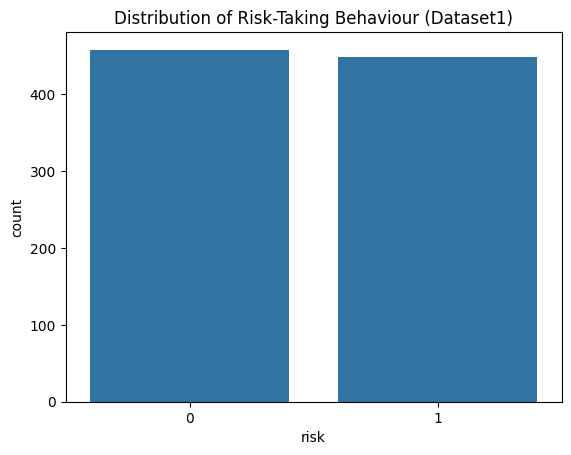

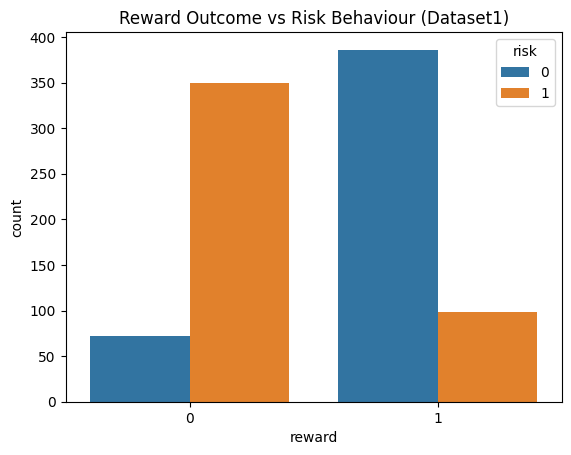

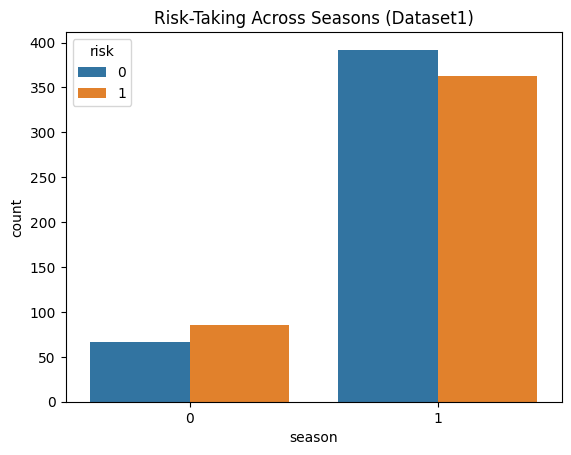

/tmp/ipython-input-384532454.py:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="month", y="bat_landing_number", data=dataset2, ci=None)


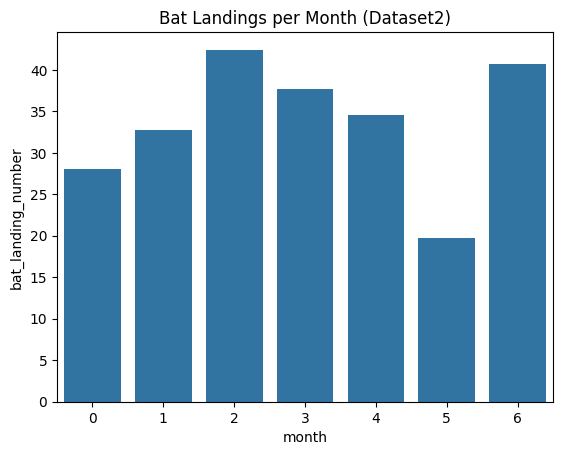

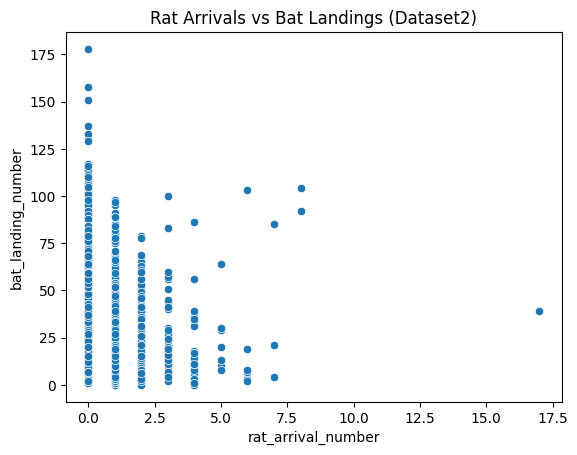

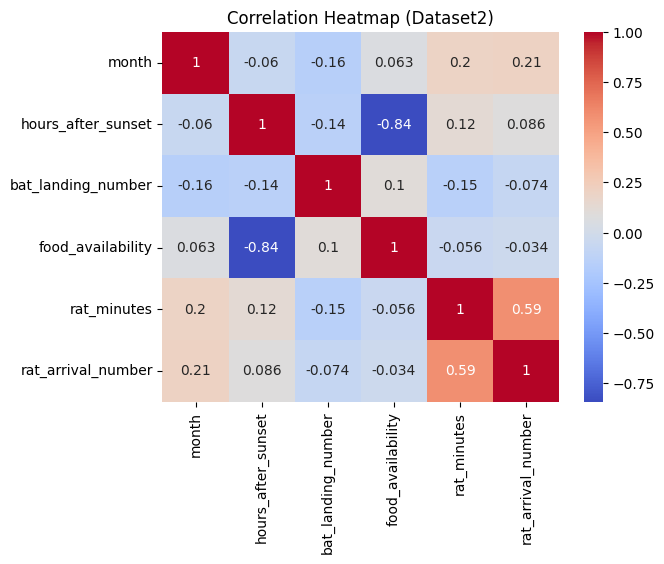


--- Investigation A ---
Chi-square test p-value (risk vs habit): 5.040138482485281e-132
Optimization terminated successfully.
         Current function value: 0.688802
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                   risk   No. Observations:                  906
Model:                          Logit   Df Residuals:                      902
Method:                           MLE   Df Model:                            3
Date:                Tue, 09 Sep 2025   Pseudo R-squ.:                0.006182
Time:                        12:00:42   Log-Likelihood:                -624.05
converged:                       True   LL-Null:                       -627.94
Covariance Type:            nonrobust   LLR p-value:                   0.05116
                                coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------

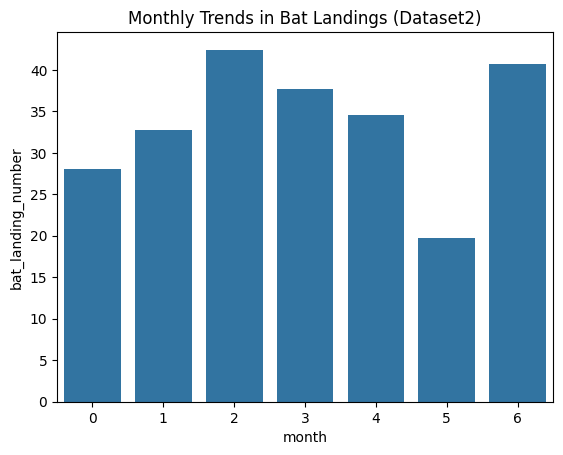


Analysis Complete ✅


In [7]:
# ==============================================
# Bat vs Rat Project - EDA & Statistical Analysis
# ==============================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, ttest_ind, f_oneway
import statsmodels.api as sm

# -------------------------------
# Load cleaned datasets
# -------------------------------
dataset1 = pd.read_csv("dataset1_cleaned.csv")
dataset2 = pd.read_csv("dataset2_cleaned.csv")

# -------------------------------
# Exploratory Data Analysis (EDA)
# -------------------------------
print("\nDataset1 Summary:")
print(dataset1.describe(include="all"))
print("\nDataset2 Summary:")
print(dataset2.describe(include="all"))

# Risk-taking behaviour distribution
sns.countplot(x="risk", data=dataset1)
plt.title("Distribution of Risk-Taking Behaviour (Dataset1)")
plt.show()

# Reward vs Risk
sns.countplot(x="reward", hue="risk", data=dataset1)
plt.title("Reward Outcome vs Risk Behaviour (Dataset1)")
plt.show()

# Risk-taking across seasons
sns.countplot(x="season", hue="risk", data=dataset1)
plt.title("Risk-Taking Across Seasons (Dataset1)")
plt.show()

# Bat landings per month
sns.barplot(x="month", y="bat_landing_number", data=dataset2, ci=None)
plt.title("Bat Landings per Month (Dataset2)")
plt.show()

# Rat arrivals vs bat landings
sns.scatterplot(x="rat_arrival_number", y="bat_landing_number", data=dataset2)
plt.title("Rat Arrivals vs Bat Landings (Dataset2)")
plt.show()

# Correlation heatmap
sns.heatmap(dataset2.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Dataset2)")
plt.show()

# -------------------------------
# Investigation A - Predator Perception
# -------------------------------
print("\n--- Investigation A ---")

# Chi-Square Test: Risk vs Habit
contingency = pd.crosstab(dataset1['risk'], dataset1['habit'])
chi2, p, dof, expected = chi2_contingency(contingency)
print("Chi-square test p-value (risk vs habit):", p)

# Logistic Regression: Predictors of Risk
X = dataset1[["seconds_after_rat_arrival", "hours_after_sunset", "season"]]
y = dataset1["risk"]
X = sm.add_constant(X)
logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())

# -------------------------------
# Investigation B - Seasonal Changes
# -------------------------------
print("\n--- Investigation B ---")

# T-test (Risk by Season: Winter=0 vs Spring=1)
season0 = dataset1[dataset1["season"]==0]["risk"]
season1 = dataset1[dataset1["season"]==1]["risk"]
t_stat, p_val = ttest_ind(season0, season1, equal_var=False)
print("T-test Risk (Winter vs Spring) p-value:", p_val)

# ANOVA example (if >2 seasons available)
anova = f_oneway(*[dataset1[dataset1["season"]==s]["risk"] for s in dataset1["season"].unique()])
print("ANOVA Risk by Season p-value:", anova.pvalue)

# Seasonal trend in bat landings
sns.barplot(x="month", y="bat_landing_number", data=dataset2, errorbar=None)
plt.title("Monthly Trends in Bat Landings (Dataset2)")
plt.show()


print("\nAnalysis Complete ✅")


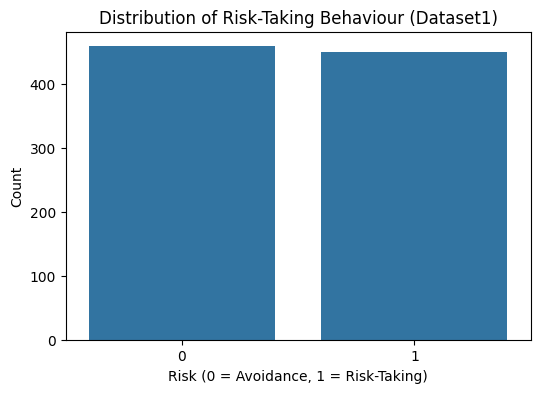

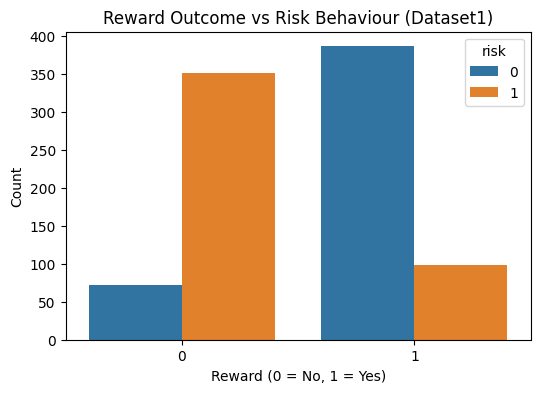

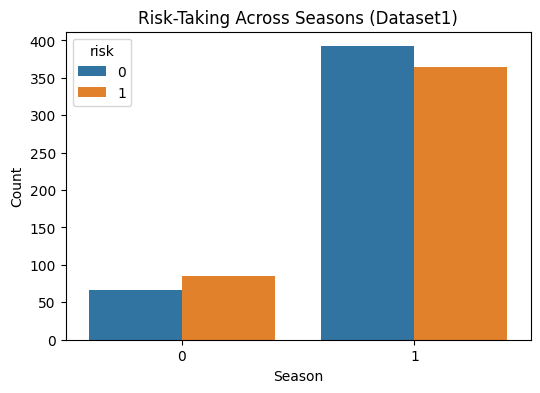

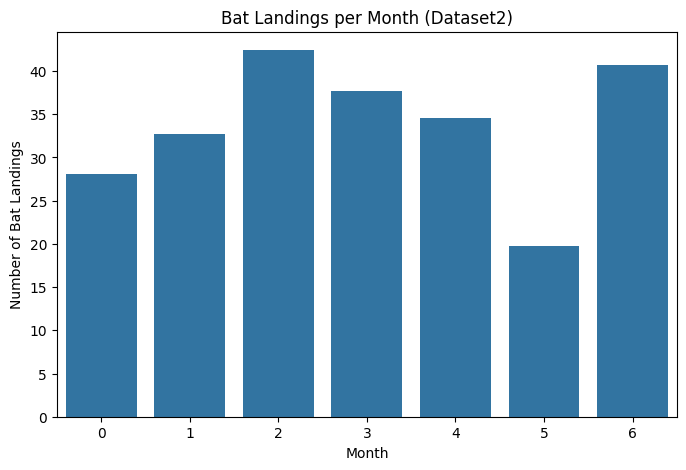

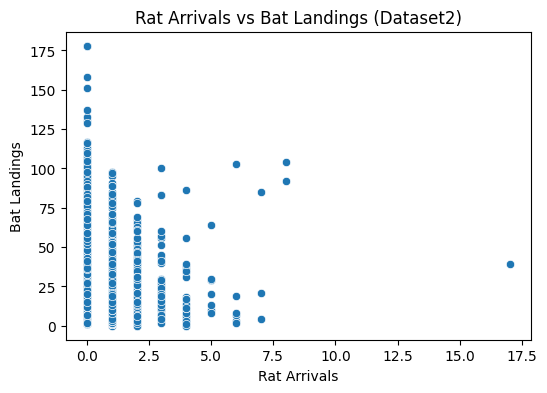

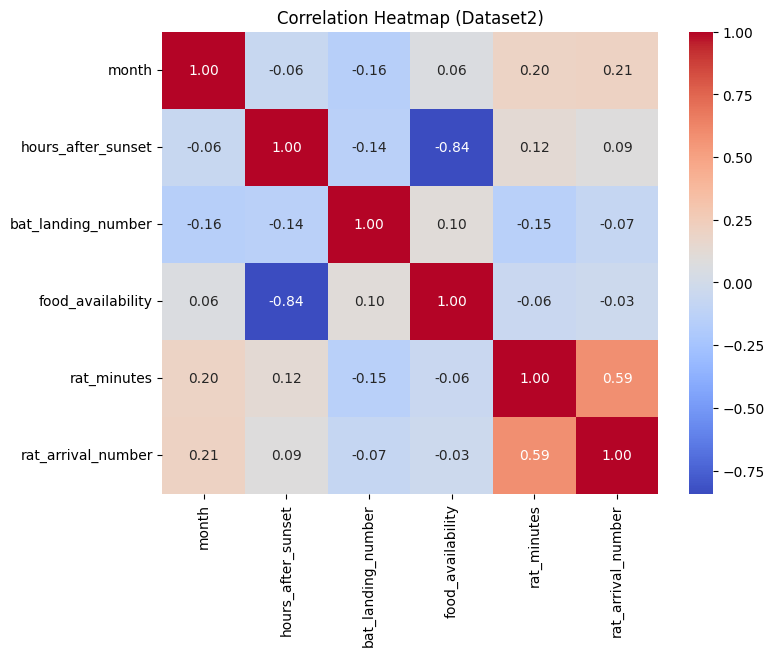

In [9]:
# ==============================================
# Bat vs Rat Project - Visualisations
# ==============================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your cleaned datasets
dataset1 = pd.read_csv("/content/dataset1.csv")
dataset2 = pd.read_csv("/content/dataset2.csv")

# -------------------------------
# 1. Risk-taking behaviour distribution (Dataset1)
# -------------------------------
plt.figure(figsize=(6,4))
sns.countplot(x="risk", data=dataset1)
plt.title("Distribution of Risk-Taking Behaviour (Dataset1)")
plt.xlabel("Risk (0 = Avoidance, 1 = Risk-Taking)")
plt.ylabel("Count")
plt.show()

# -------------------------------
# 2. Reward vs Risk (Dataset1)
# -------------------------------
plt.figure(figsize=(6,4))
sns.countplot(x="reward", hue="risk", data=dataset1)
plt.title("Reward Outcome vs Risk Behaviour (Dataset1)")
plt.xlabel("Reward (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# -------------------------------
# 3. Risk-taking across seasons (Dataset1)
# -------------------------------
plt.figure(figsize=(6,4))
sns.countplot(x="season", hue="risk", data=dataset1)
plt.title("Risk-Taking Across Seasons (Dataset1)")
plt.xlabel("Season")
plt.ylabel("Count")
plt.show()

# -------------------------------
# 4. Bat landings per month (Dataset2)
# -------------------------------
plt.figure(figsize=(8,5))
sns.barplot(x="month", y="bat_landing_number", data=dataset2, errorbar=None)
plt.title("Bat Landings per Month (Dataset2)")
plt.xlabel("Month")
plt.ylabel("Number of Bat Landings")
plt.show()

# -------------------------------
# 5. Rat arrivals vs Bat landings (Dataset2)
# -------------------------------
plt.figure(figsize=(6,4))
sns.scatterplot(x="rat_arrival_number", y="bat_landing_number", data=dataset2)
plt.title("Rat Arrivals vs Bat Landings (Dataset2)")
plt.xlabel("Rat Arrivals")
plt.ylabel("Bat Landings")
plt.show()

# -------------------------------
# 6. Correlation heatmap (Dataset2)
# -------------------------------
plt.figure(figsize=(8,6))
corr = dataset2.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Dataset2)")
plt.show()
